In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


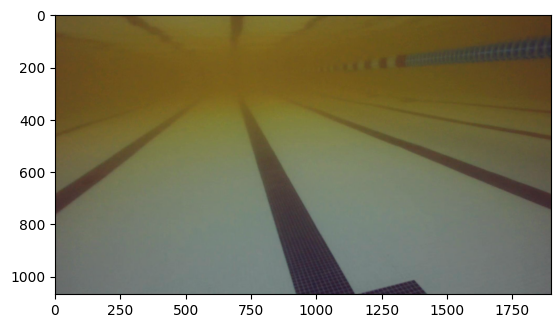

In [2]:

img = cv2.imread('rov_pool.jpeg')
plt.imshow(img)


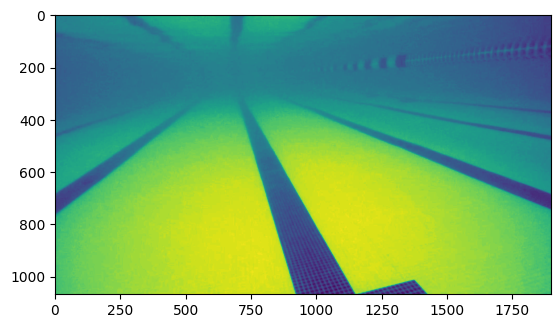

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

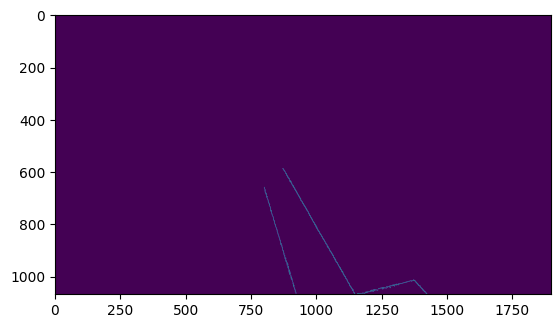

In [4]:
edges = cv2.Canny(gray, 125, 60, apertureSize=3) # detect edges

plt.imshow(edges)


In [5]:
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/360,
                125,
                minLineLength=200,
                maxLineGap=20,
        ) # detect lines
print(len(lines))

4


In [7]:

slopes = []
equations = {}
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1) / (x2 - x1)
    y_intercept = y2 - x2*slope
    
    pair = (slope, y_intercept)
    replaced = False
    to_be_popped = []
    avg_slope = pair[0]
    avg_intercept = pair[1]
    identical_counter = 1
    for pairing in equations:
        if abs(min(pairing[0], pair[0])/max(pairing[0], pair[0])) > 0.95 and abs(min(pairing[1], pair[1])/max(pairing[1], pair[1])) > 0.95:
            avg_slope+=(pairing[0])
            avg_intercept+=(pairing[1])
            identical_counter+=1
            to_be_popped.append(pairing)
    
    for removal in to_be_popped:
        equations.pop(removal)
    equations[(avg_slope / identical_counter, avg_intercept / identical_counter)] = (x1,y1)

    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    to_be_popped.clear()


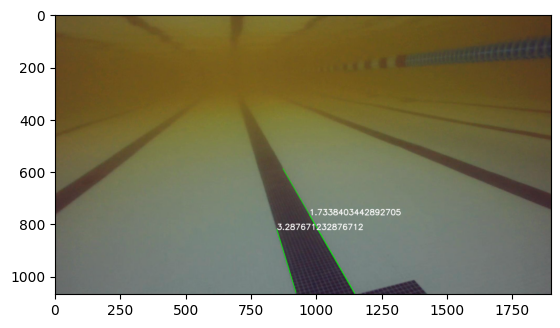

In [8]:

for line in equations:
    slope = line[0]
    x1 = equations[line][0]
    y1 = equations[line][1]
    cv2.putText(img, str(slope), (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


plt.imshow(img)

# vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
# ret, frame = vcap.read()
# plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
from dt_apriltags import Detector

In [12]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

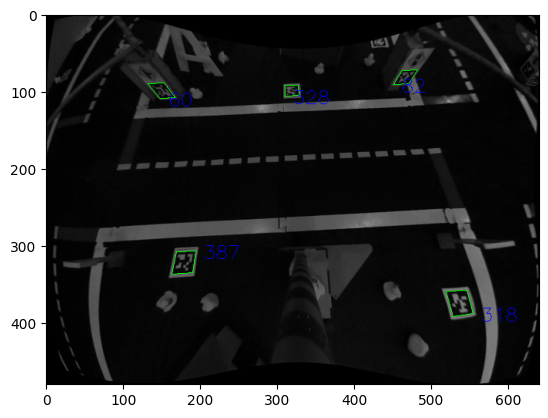

In [14]:
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    

plt.imshow(color_img)